# ***EDA with dataset of Flight Price***

# **About the dataset:**

**1 Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines**

**2 Flight: Flight stores information regarding the plane's flight code. It is a categorical feature**

**3 Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities**

**4 Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels**

**5 Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities**

**6 Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time**

**7 Destination City: City where the flight will land. It is a categorical feature having 6 unique cities**

**8 Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy**

**9 Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours**

**10 Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date**

**11 Price: Target variable stores information of the ticket price**

In [1]:
#  Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving flight_price.xlsx to flight_price.xlsx


In [3]:
# Create Dataframe and Read the dataset using Pandas
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# IN this data set there is 10683 rows and 11 columns
# All the features are identified as object except Price column.

# Data Visualization

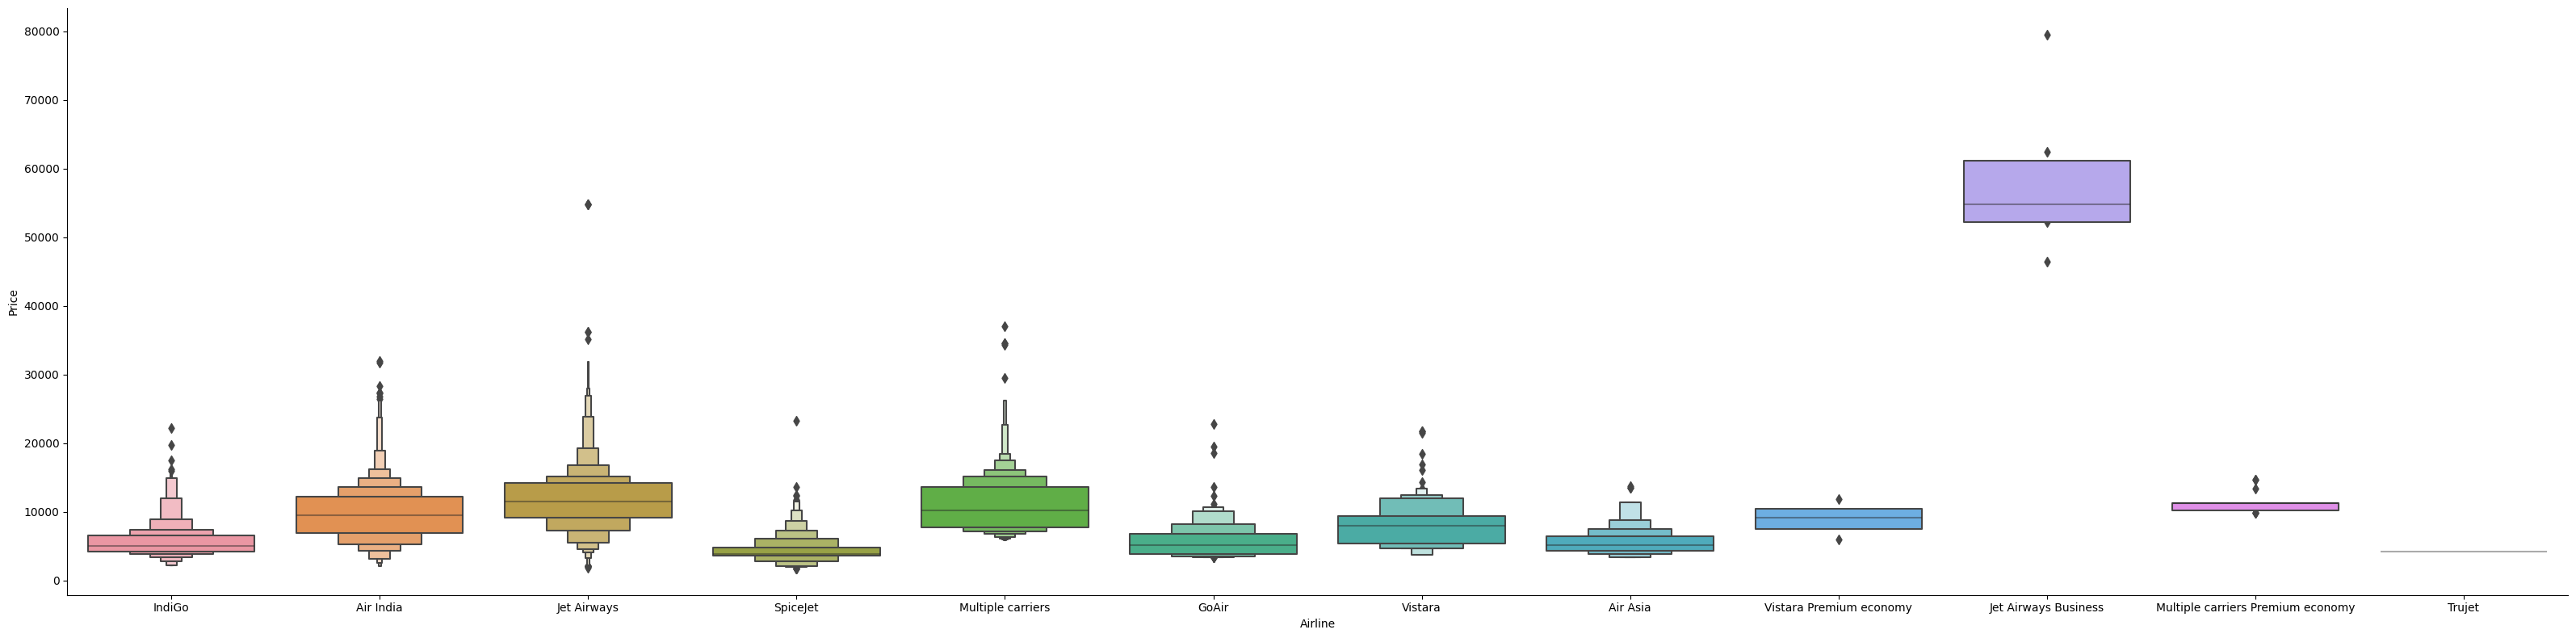

In [7]:
sns.catplot(df,y = "Price", x = "Airline", kind="boxen", height = 8, aspect = 4)
plt.show()

**Jet Airways has the most outliers in terms of price**
**The most expensive option is ‘JetAirways Business**

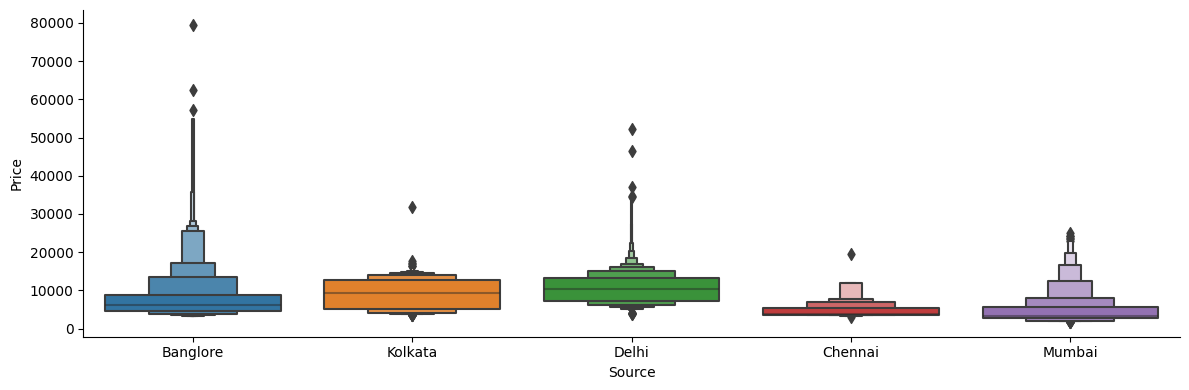

In [8]:
sns.catplot(df,y = "Price", x = "Source", kind="boxen", height = 4, aspect = 3)
plt.show()

**Banglore as the source location has the most outliers while Chennai has the least**

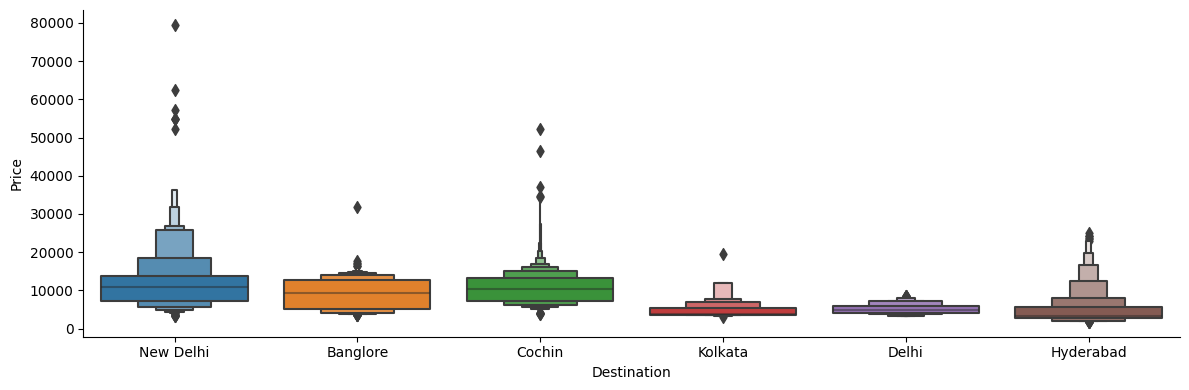

In [9]:
sns.catplot(df,y = "Price", x = "Destination", kind="boxen", height = 4, aspect = 3)
plt.show()

**New Delhi has the most outliers and Kolkata has the least**

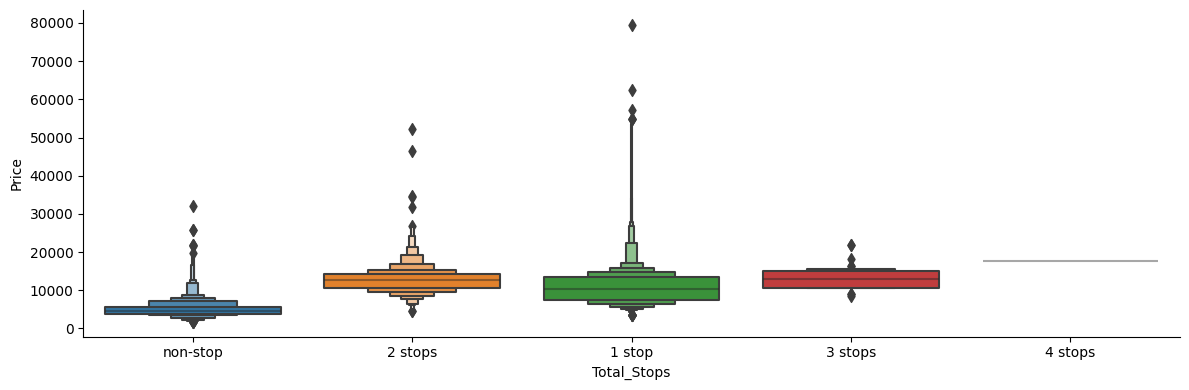

In [10]:
sns.catplot(df,y = "Price", x = "Total_Stops", kind="boxen", height = 4, aspect = 3)
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

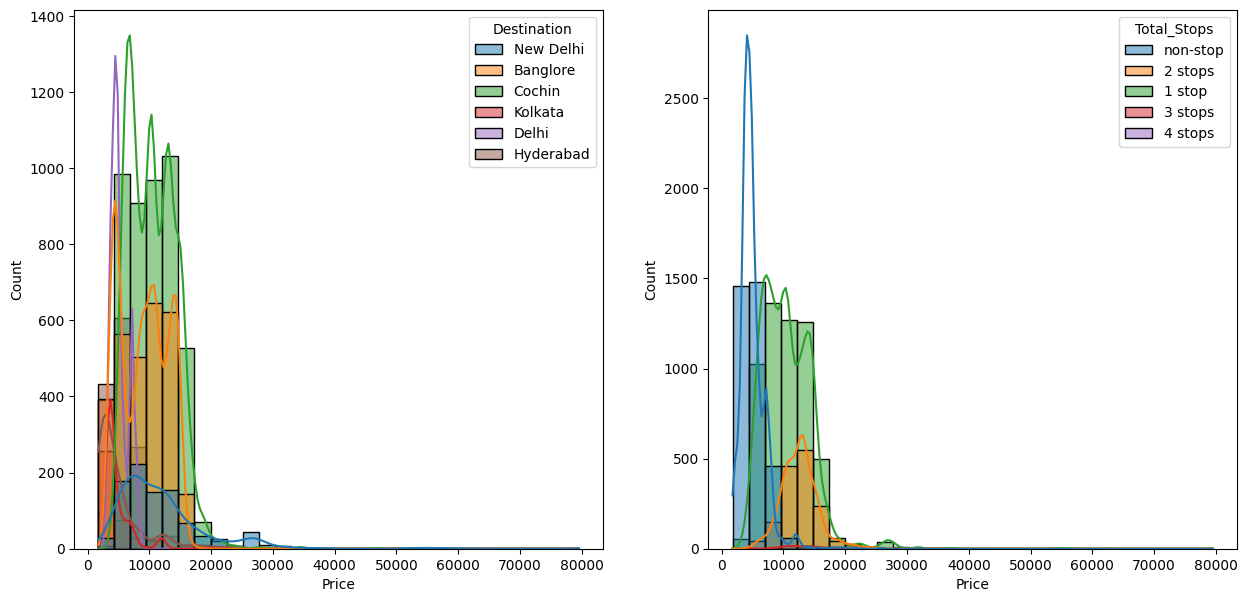

In [11]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Price',bins=30,kde=True,hue='Destination')
plt.subplot(122)
sns.histplot(data=df,x='Price',bins=30,kde=True,hue='Total_Stops')

<Axes: xlabel='Price', ylabel='Count'>

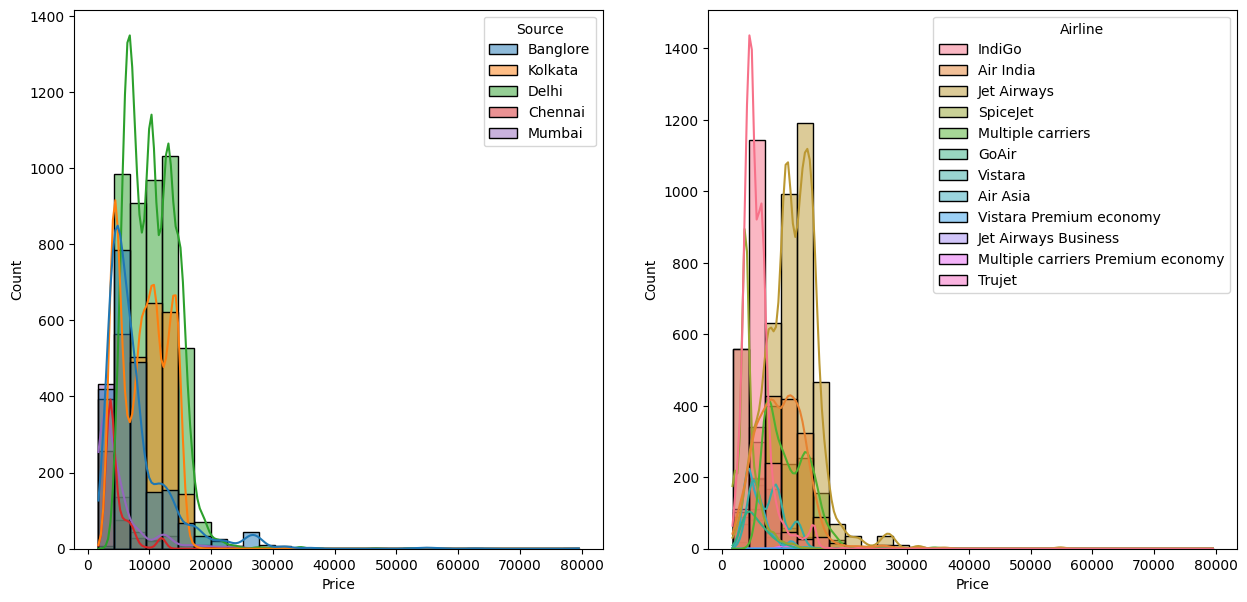

In [12]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Price',bins=30,kde=True,hue='Source')
plt.subplot(122)
sns.histplot(data=df,x='Price',bins=30,kde=True,hue='Airline')

<ipython-input-13-d8ad3f21a50e>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-13-d8ad3f21a50e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-13-d8ad3f21a50e>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='Destination', ylabel='count'>

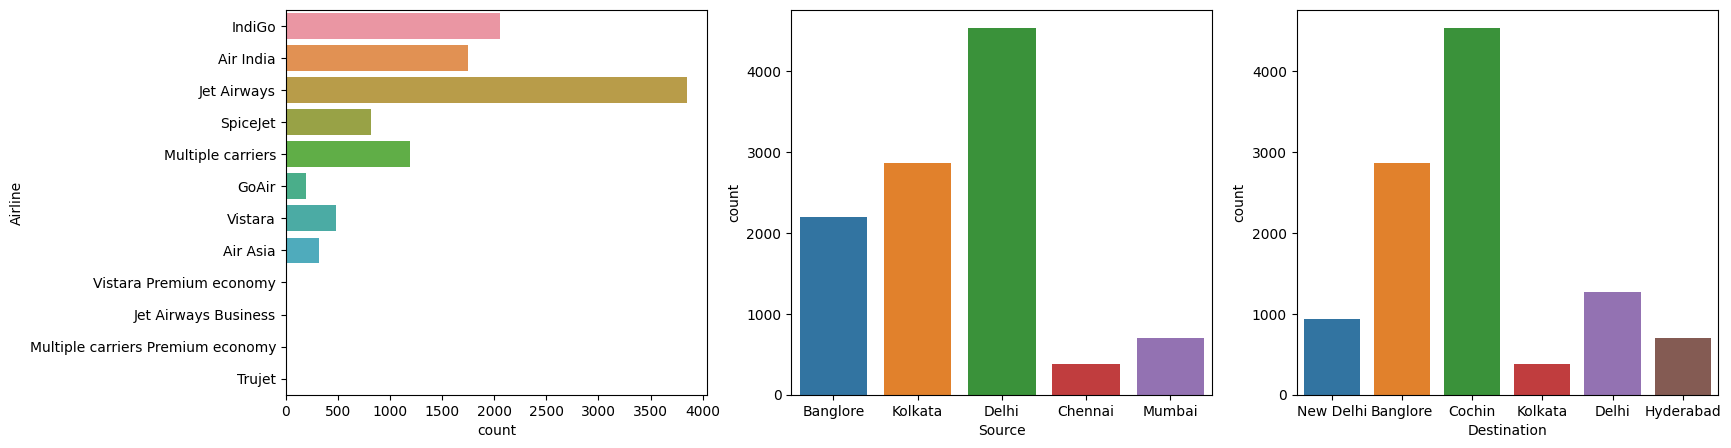

In [13]:
fig,axis=plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.countplot(data=df,y='Airline')
plt.subplot(142)
sns.countplot(data=df,x='Source')
plt.subplot(143)
sns.countplot(data=df,x='Destination')

In [14]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [16]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

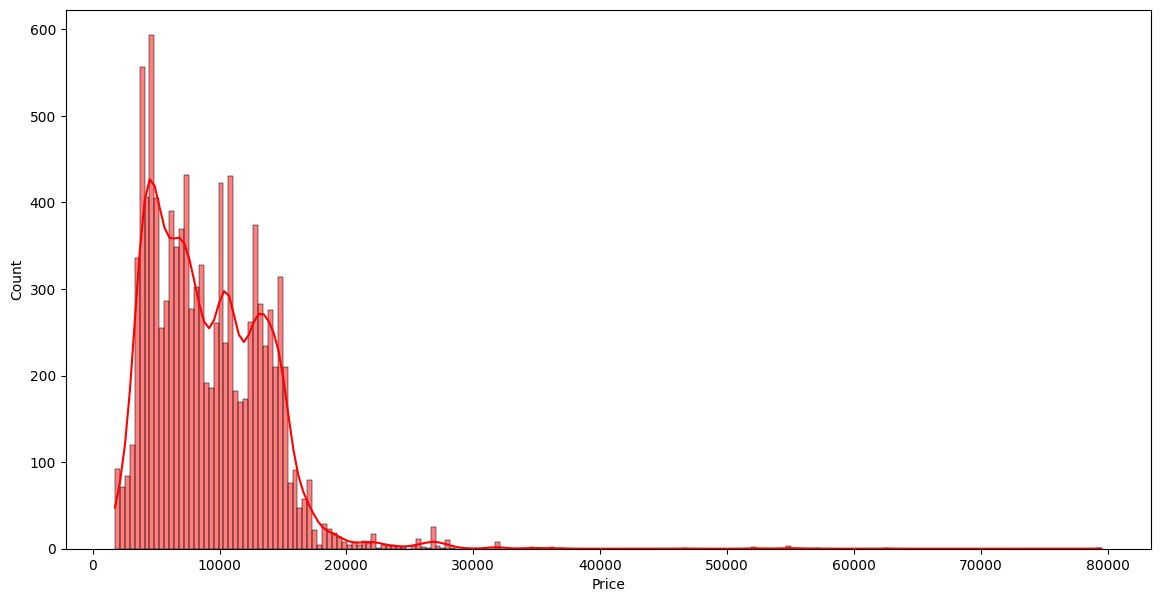

In [17]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'r')

**From the chart it is clear that the Target Variable is Skewed**

Text(0.5, 1.0, 'Top 5 Companies whose flight tickets are sold the most')

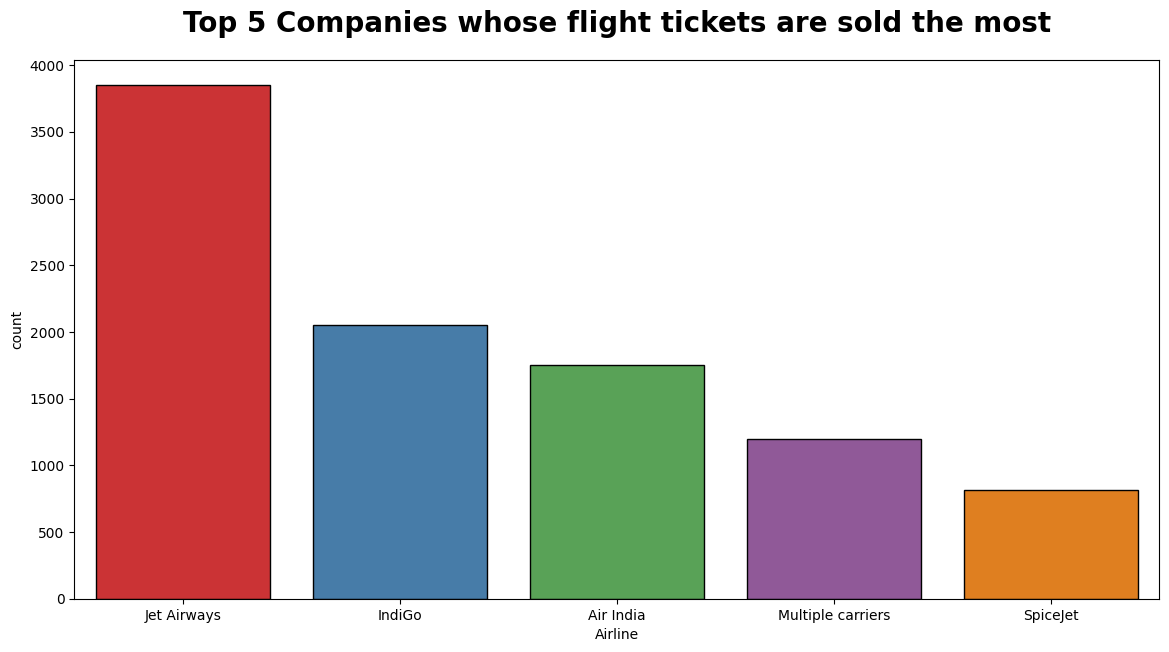

In [18]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts()[0:5].index)
plt.title("Top 5 Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)

**As per the Chart these are top 5 companies whose tickets are sold the most**

**Of the total flight tickets sold Jet Airways has the highest share followed by Indigo**

**Mean Price of Jet Airways Flight Ticket is Rs 11,643.92**

<Axes: xlabel='Price', ylabel='Airline'>

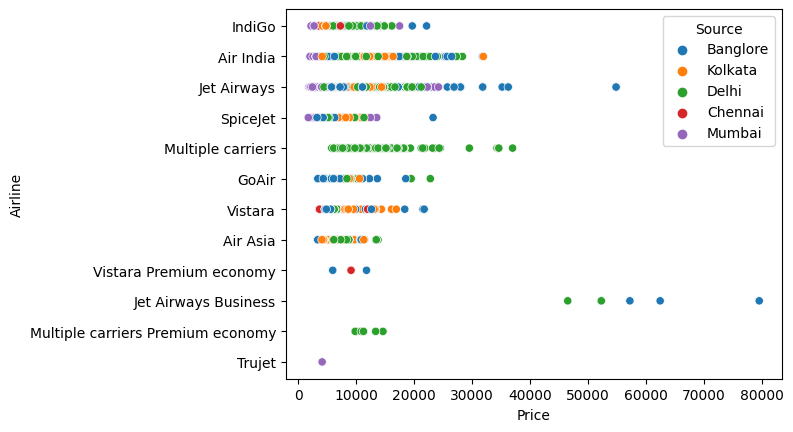

In [19]:
sns.scatterplot(y='Airline',x='Price',hue='Source',data=df)

<Axes: xlabel='Price', ylabel='Airline'>

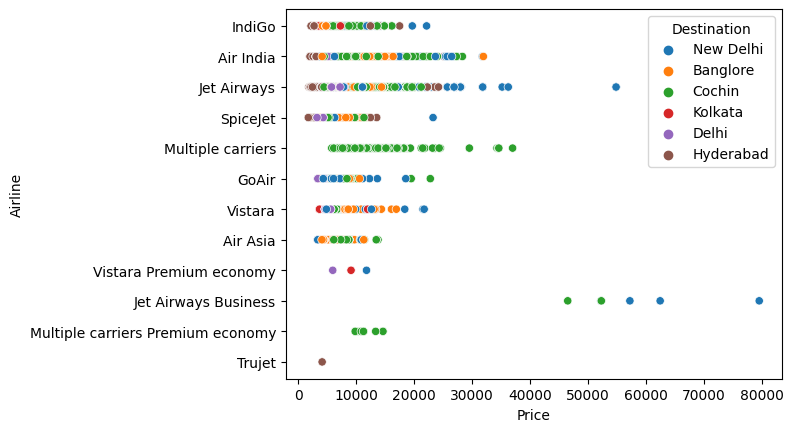

In [20]:
sns.scatterplot(y='Airline',x='Price',hue='Destination',data=df)

<Axes: xlabel='Price', ylabel='Airline'>

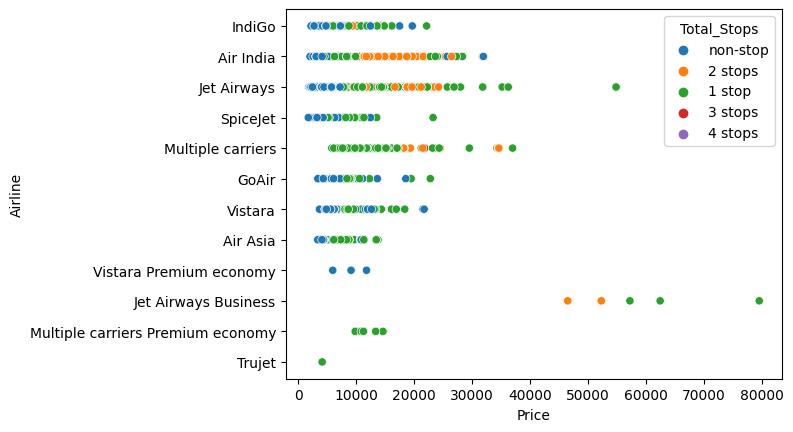

In [21]:
sns.scatterplot(y='Airline',x='Price',hue='Total_Stops',data=df)

Text(0.5, 1.0, 'Airlines Company vs Flight Ticket Price')

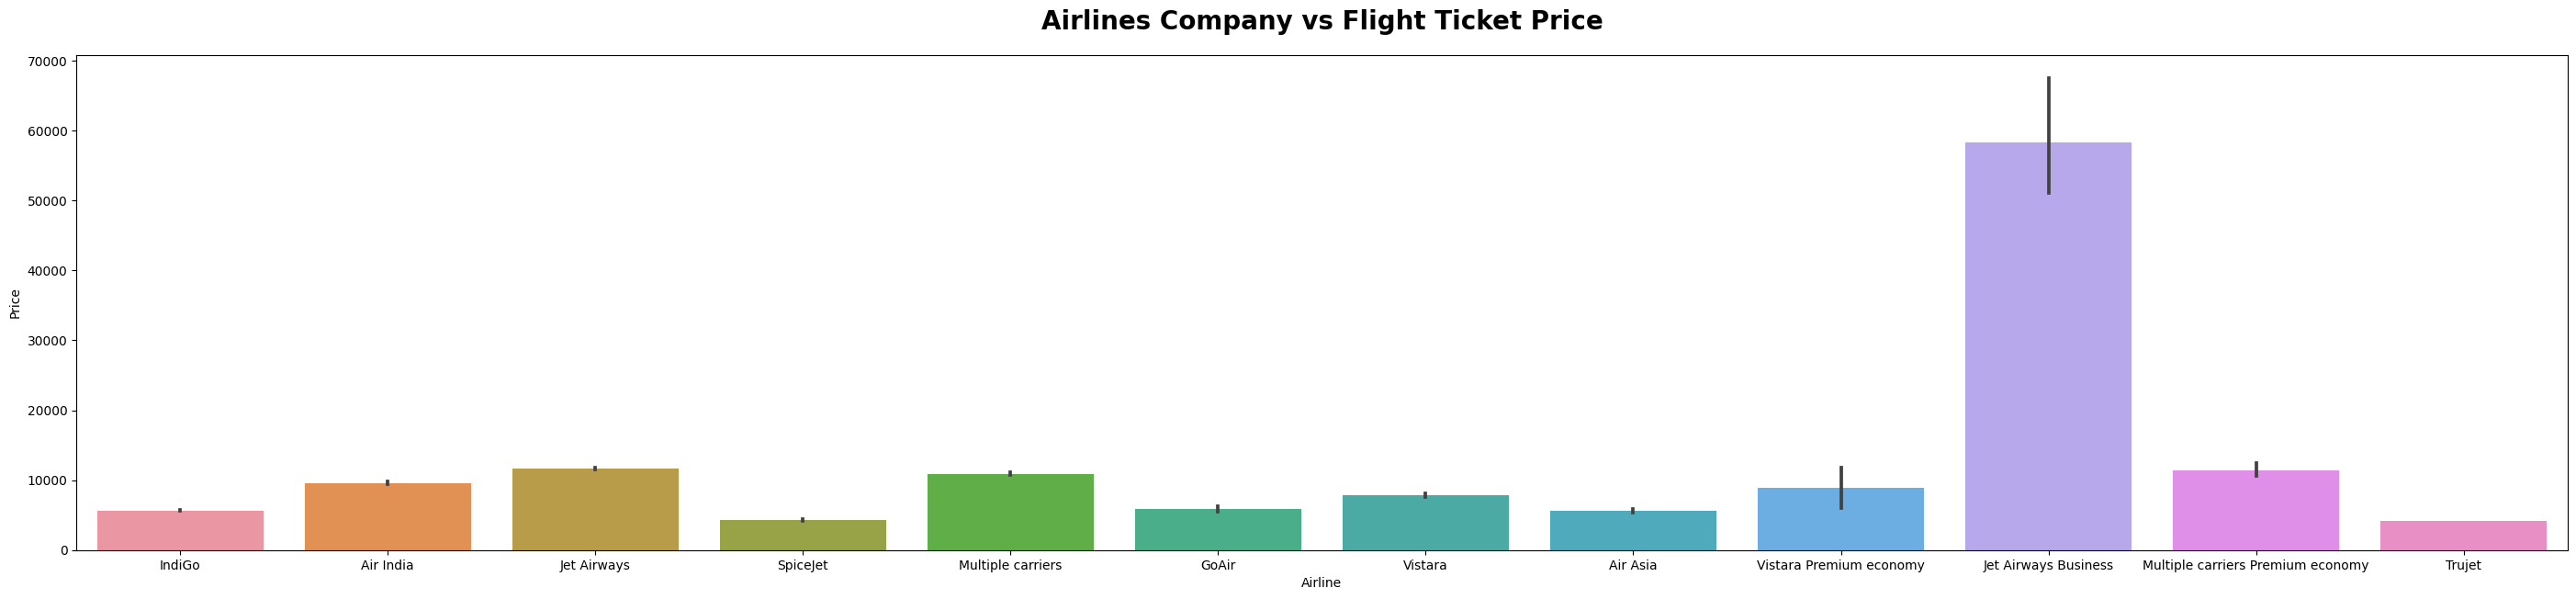

In [22]:
plt.subplots(figsize=(35,7))
sns.barplot(df,x='Airline', y='Price')
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)

**Costliest Flight Tickets Sold is of Jet Airways Business**

**Second Most Costliest Flight Tickets Sold is of Jet Airways**

**As can be seen, the airline’s name is important. The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well**

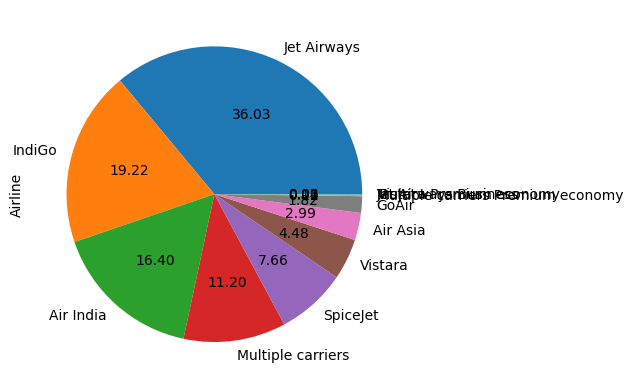

In [23]:
df['Airline'].value_counts().plot(kind="pie" ,autopct="%.2f")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


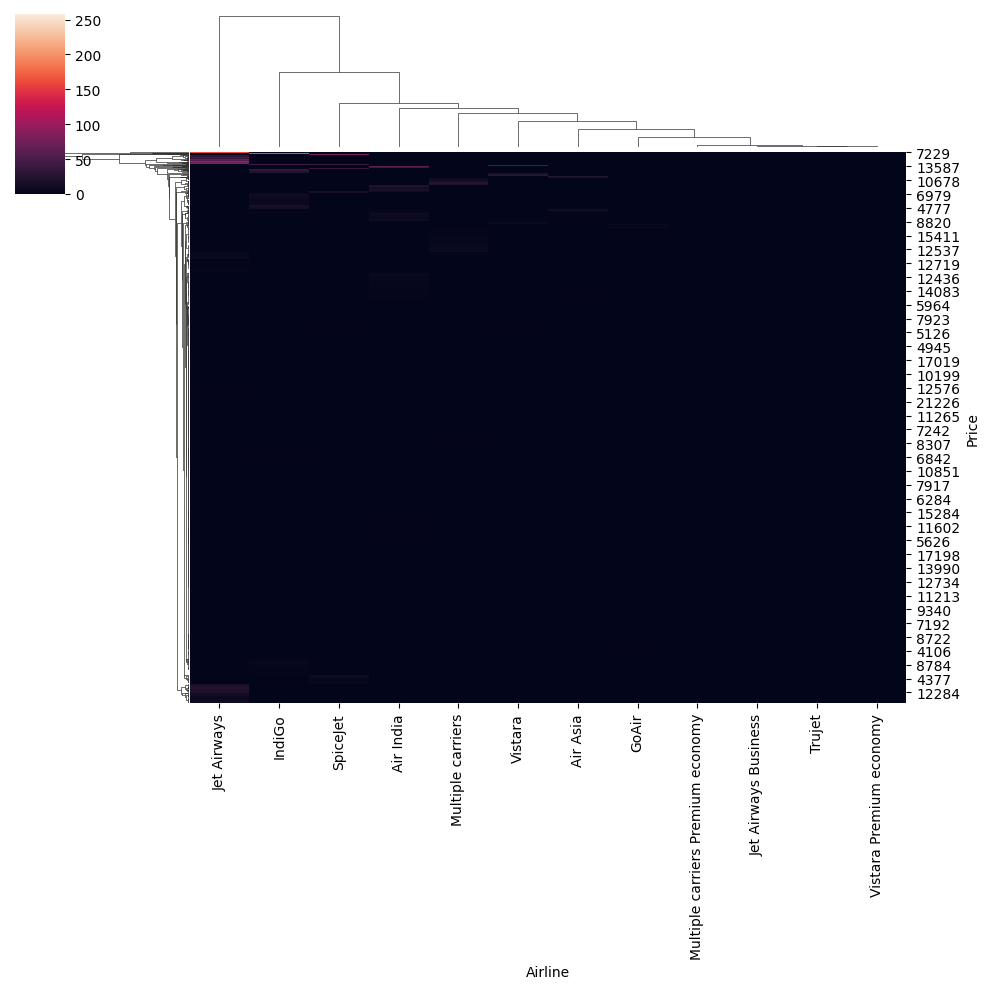

In [24]:
sns.clustermap(pd.crosstab(df['Price'],df['Airline']))
plt.show()

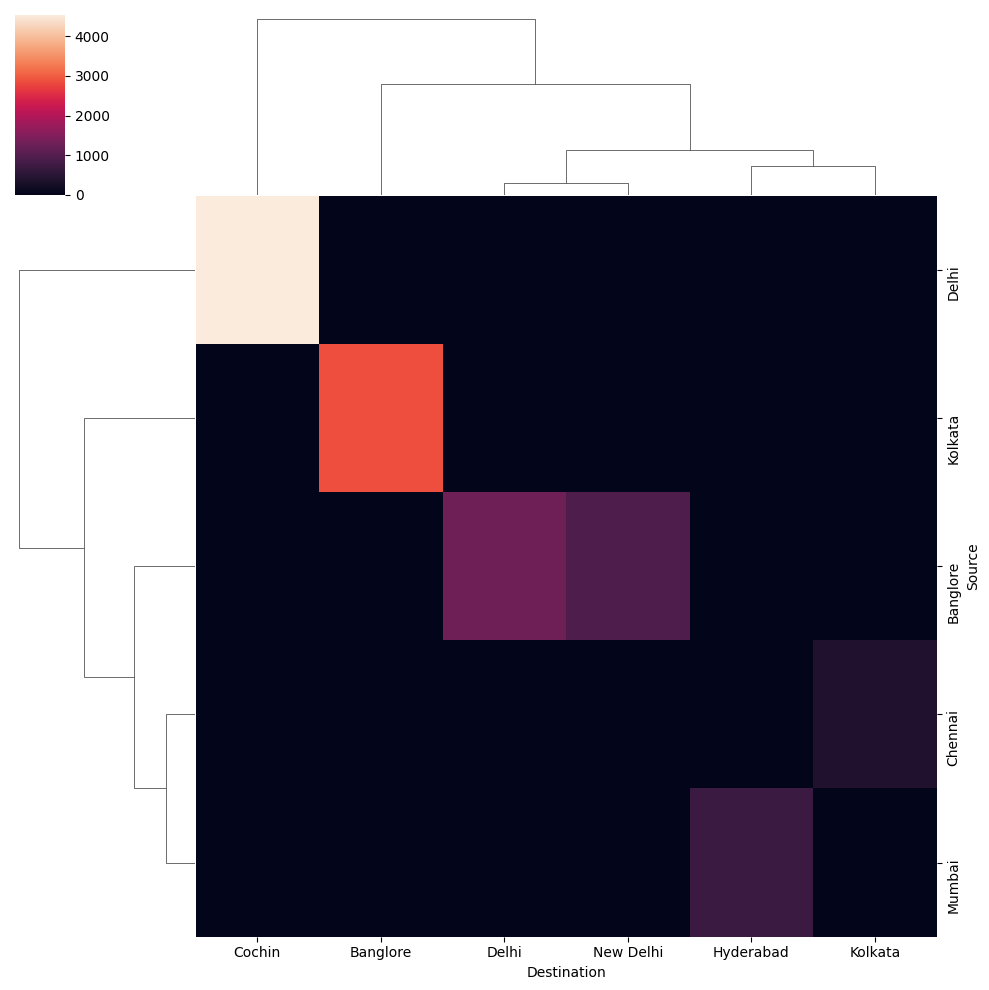

In [25]:
sns.clustermap(pd.crosstab(df['Source'],df['Destination']))
plt.show()

## **EDA and Feature engineering**

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [27]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**The maximum and minimum Price is 79512 & 1759**

In [28]:
#checking for null values in dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Handling Categorical Data:**

In [29]:
#OneHotEncoding -----> Nominal data
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()
encoded_df= pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())
df = pd.concat([df,encoded_df],axis=1)
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)

In [30]:
df.head(2)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

df.drop('Date_of_Journey',axis=1,inplace=True)

df['Arrival_hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

df['Arrival_hours']=df['Arrival_hours'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)


Text(0, 0.5, 'Count of flights')

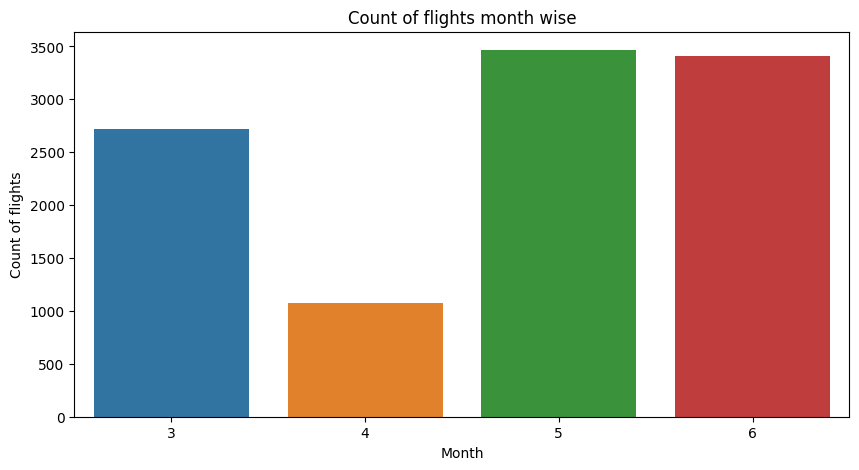

In [32]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

**May has the most number of flights**

Text(0, 0.5, 'Count of flights')

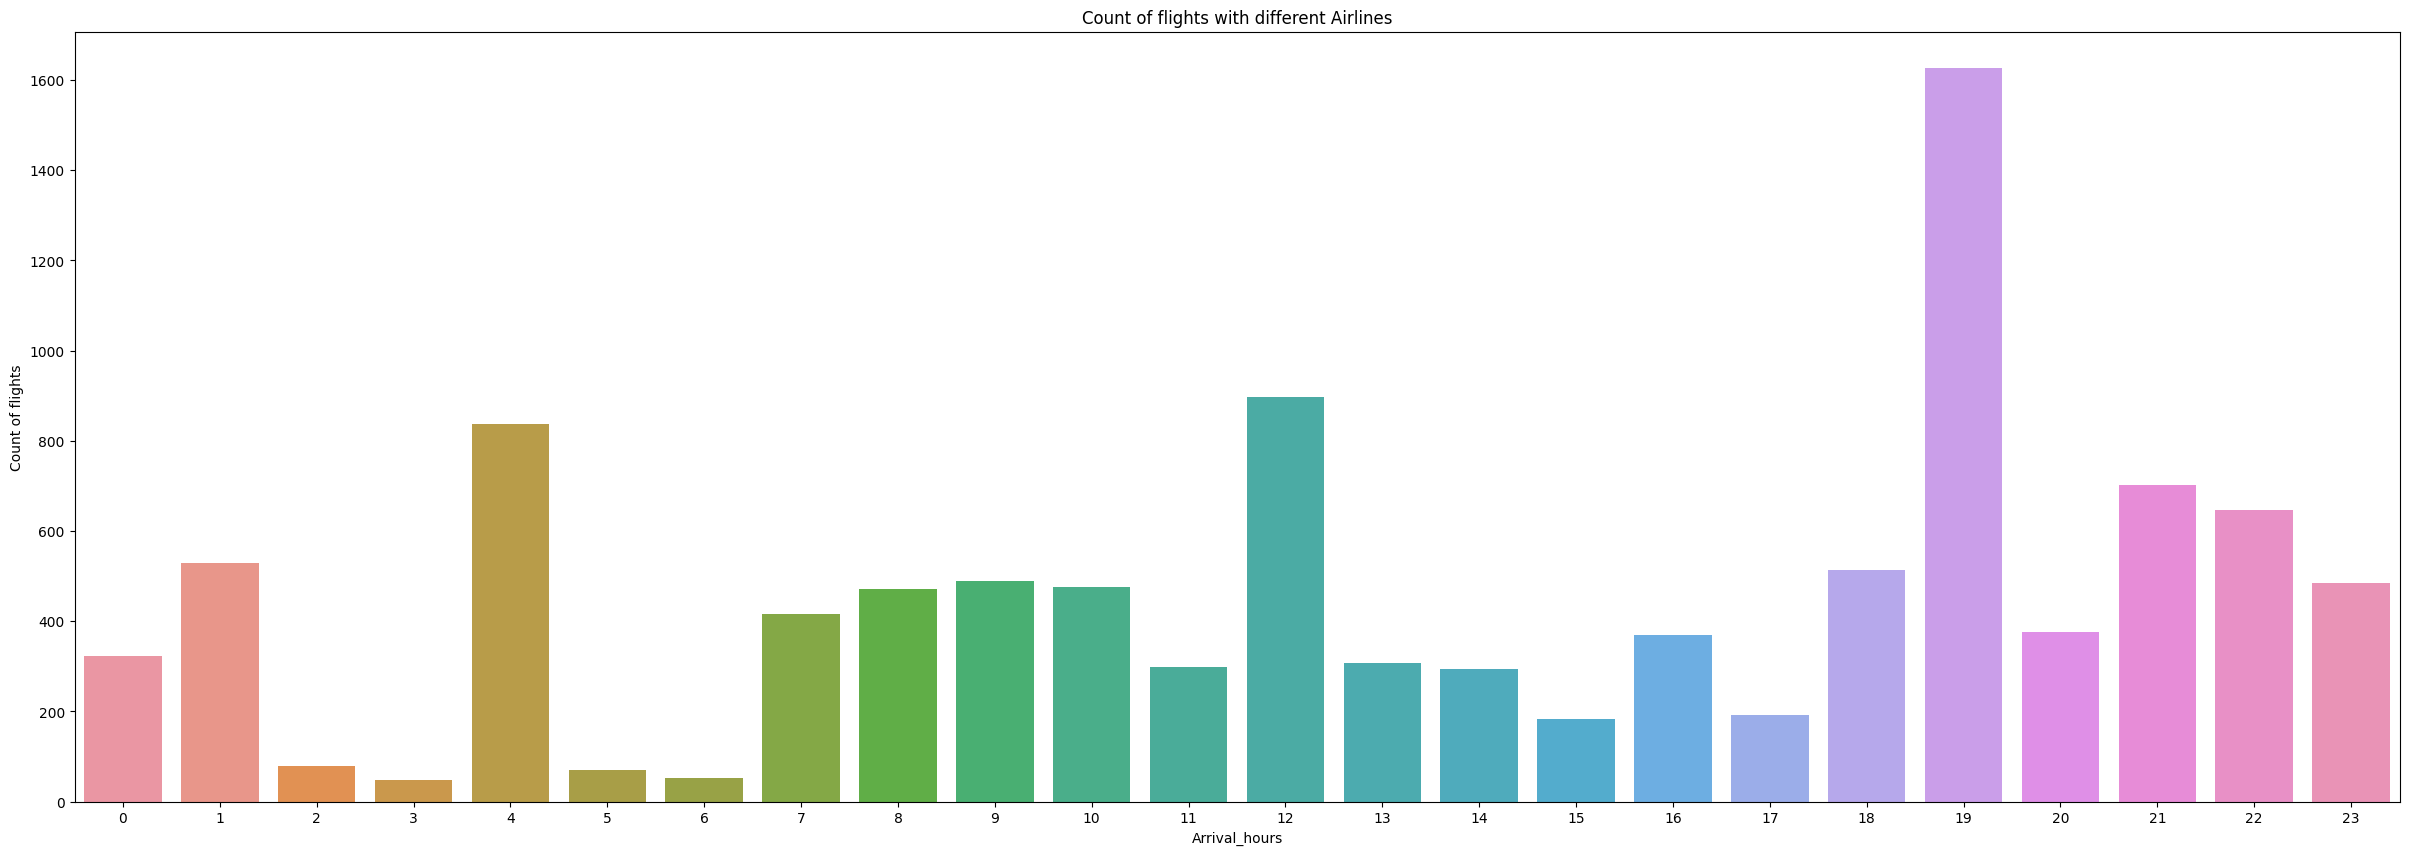

In [33]:
plt.figure(figsize = (30,10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Arrival_hours', data = df)
plt.xlabel('Arrival_hours')
plt.ylabel('Count of flights')

Text(0, 0.5, 'Count of flights')

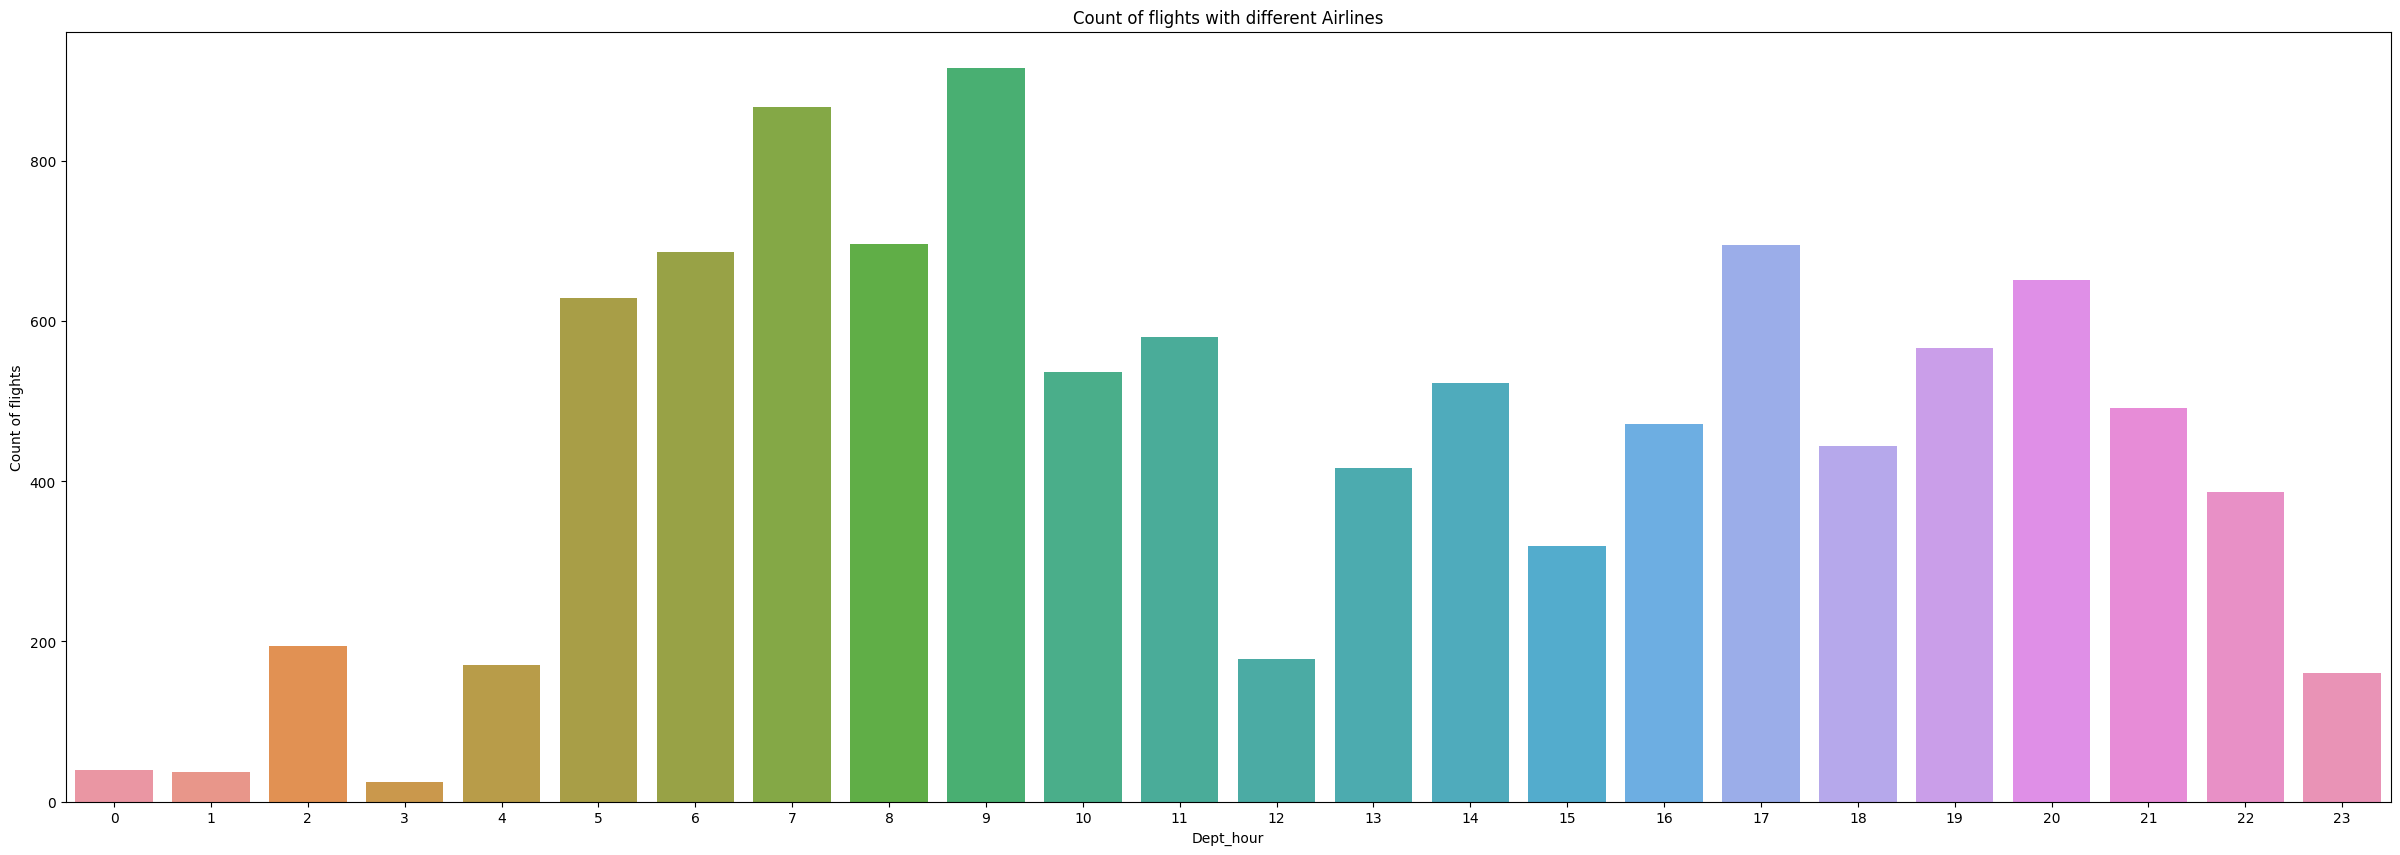

In [34]:
plt.figure(figsize = (30,10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Dept_hour', data = df)
plt.xlabel('Dept_hour')
plt.ylabel('Count of flights')

In [35]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})
from sklearn.preprocessing import LabelEncoder
Labelencoder= LabelEncoder()
df['Additional_Info']=Labelencoder.fit_transform(df['Additional_Info'])

df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_hour']=df['Duration_hour'].astype('int')
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.Duration_min.fillna(30,inplace=True)
df['Duration_min']=df['Duration_min'].astype('int')
df.drop('Duration',axis=1,inplace=True)


In [36]:
df.drop('Route',axis=1,inplace=True)

In [37]:
df.head(2)

,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_New Delhi,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_min
0,0,8,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,24,3,2019,1,10,22,20,2,50
1,2,8,7662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,5,2019,13,15,5,50,7,25


<Axes: >

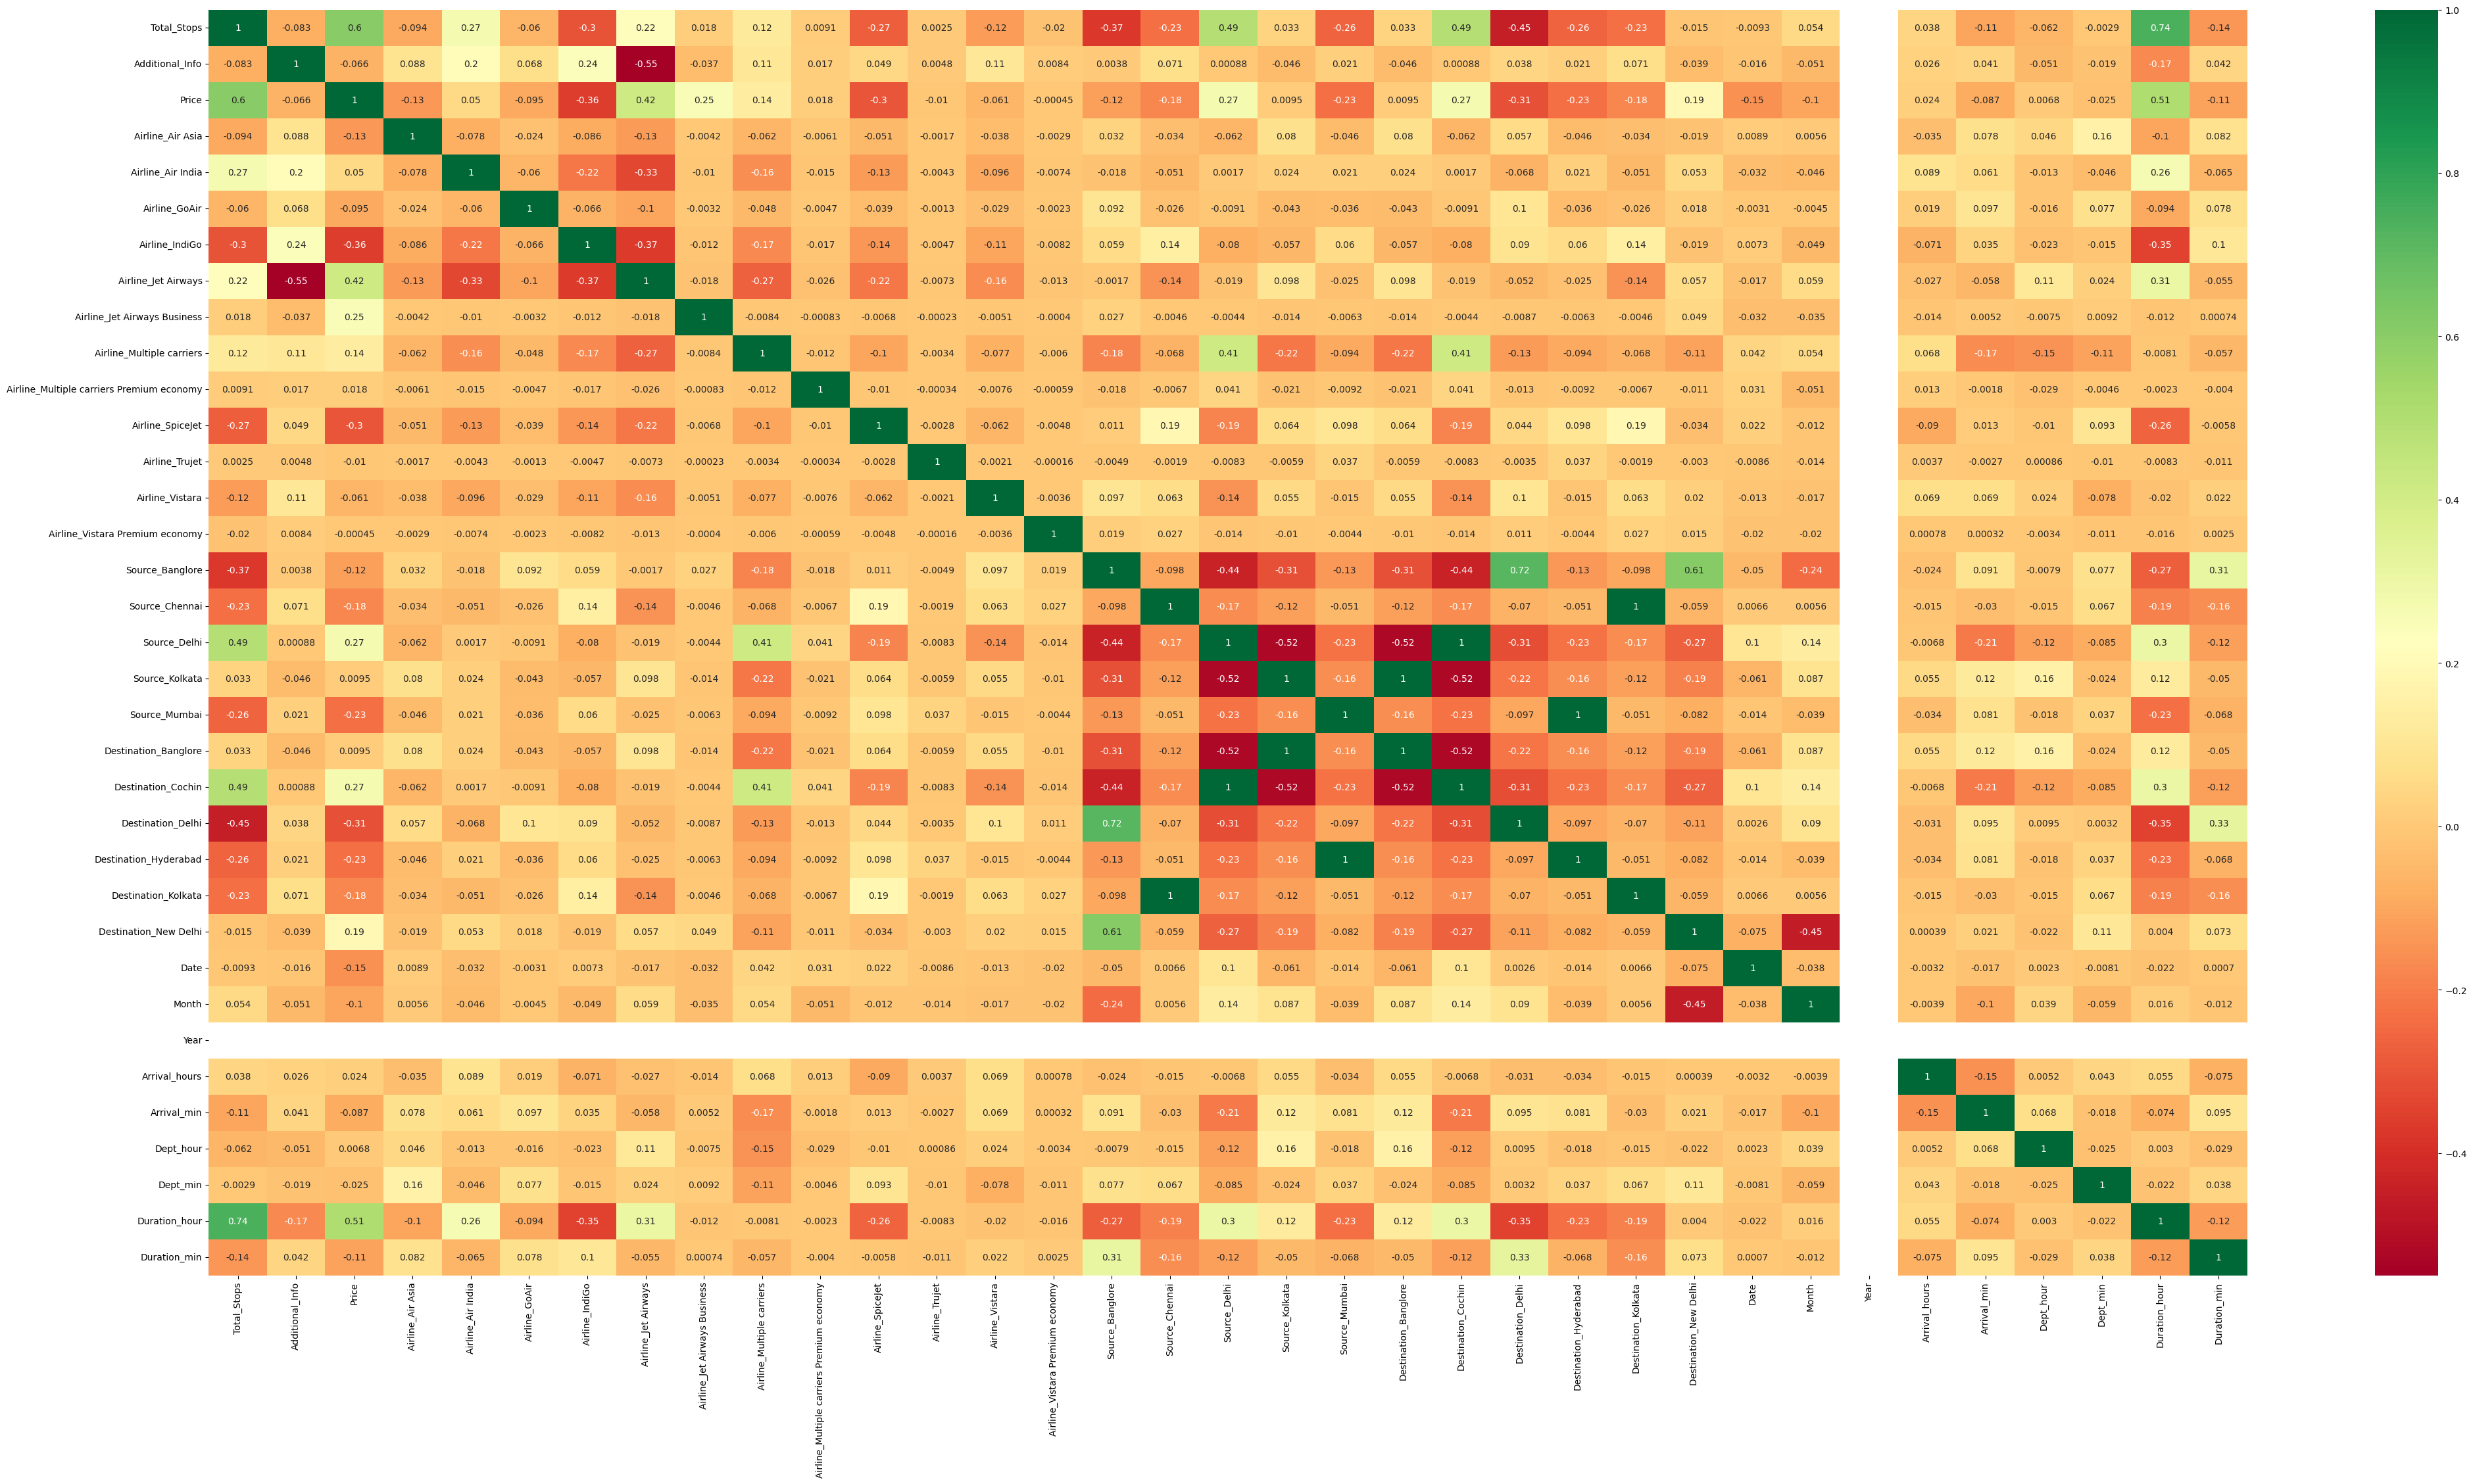

In [38]:
plt.figure(figsize=(50,25))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [39]:
df['Year'].unique()

array([2019])

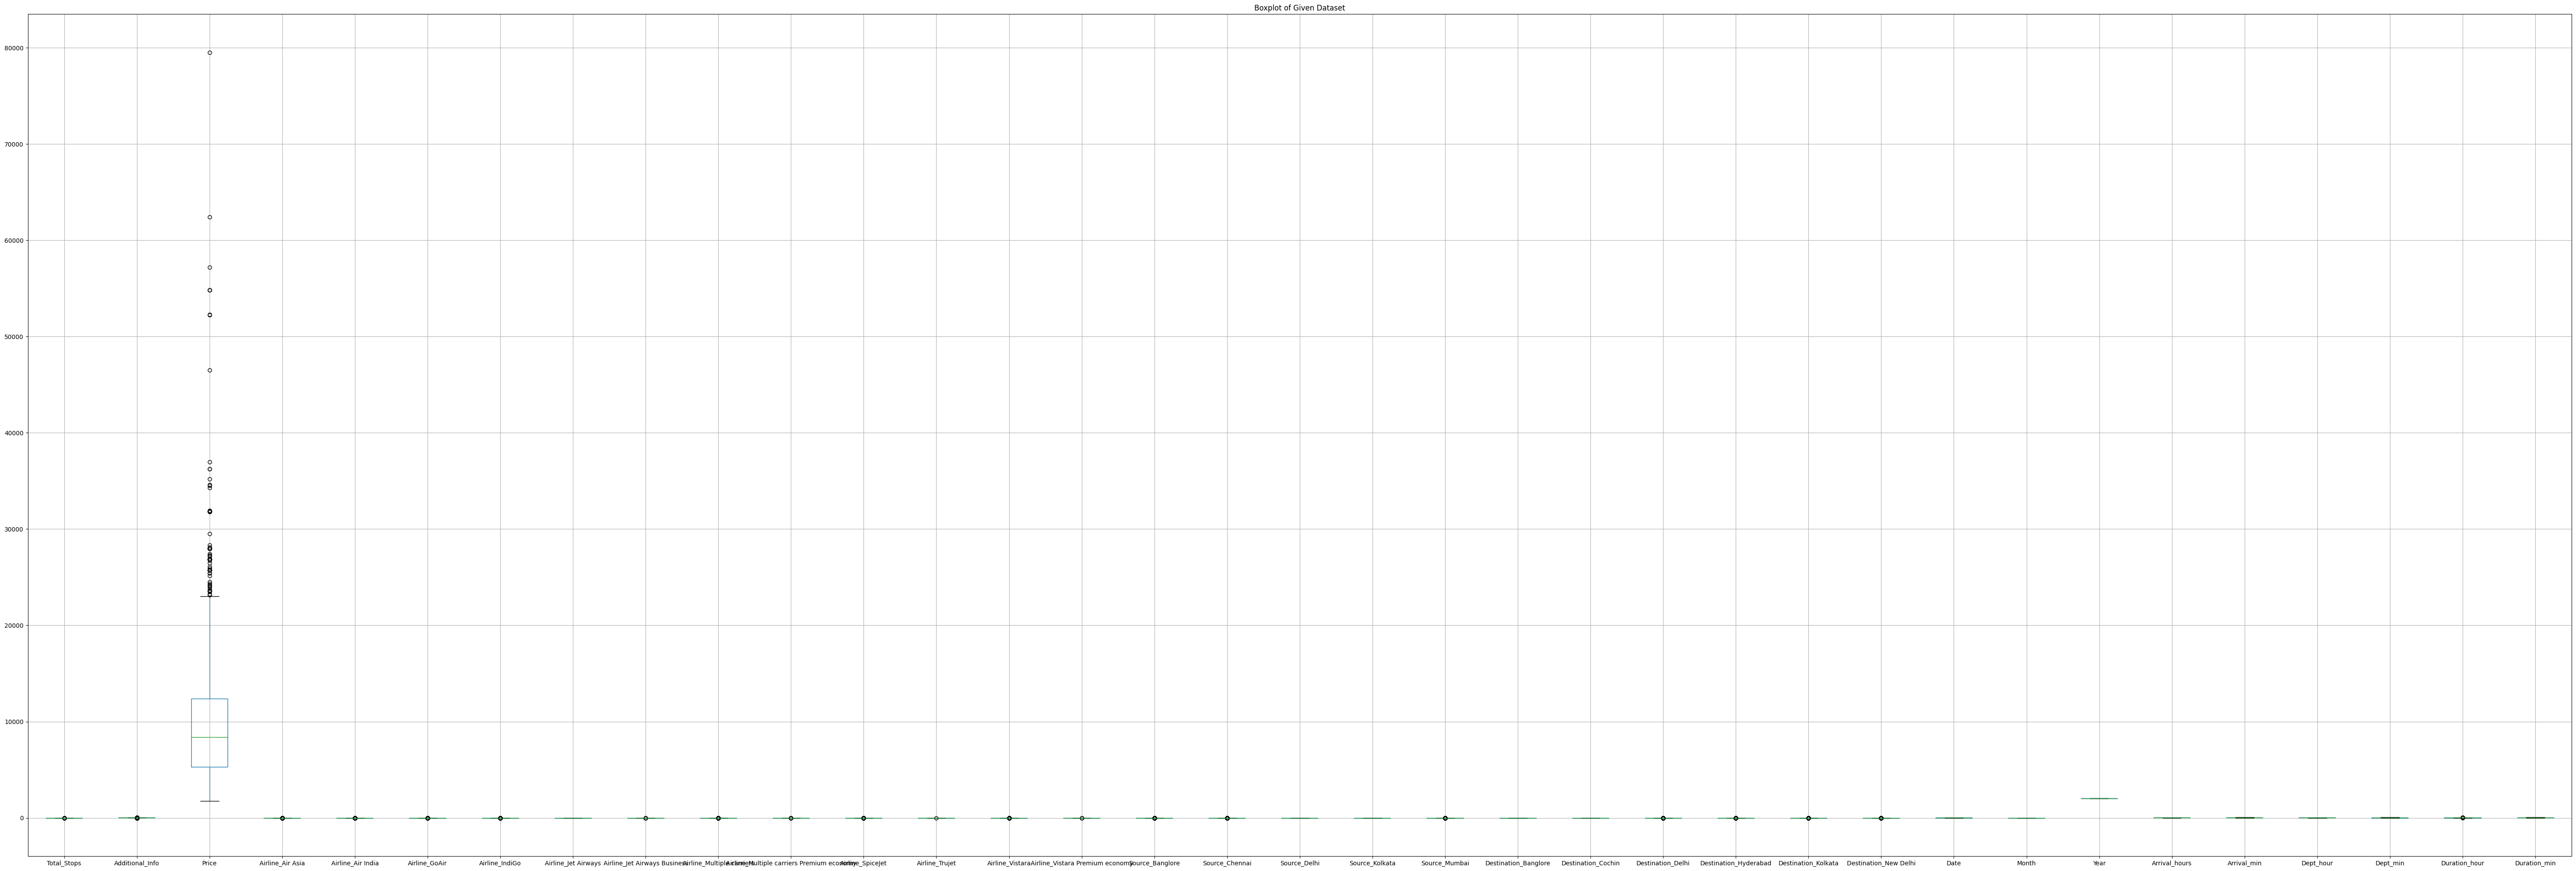

In [40]:
fig = plt.figure(figsize =(75,25))
ax = df.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

##**REPORT**

**This is the data of year 2019**

**Jet Airways has the most outliers in terms of price**

**The most expensive option is ‘Jet Airways Business**

**Banglore as the source location has the most outliers while Chennai has the least**

**New Delhi has the most outliers and Kolkata has the least in terms of destination**

**The Price is Right Skewed**

**The maximum and minimum Price is 79512 & 1759**

**The Month May has the most number of flights**

**Costliest Flight Tickets Sold is of Jet Airways Business**

**Second Most Costliest Flight Tickets Sold is of Jet Airways**

**The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well**